In [73]:
#sigmoid函数 y=g(theta.T*x)
import numpy as np
import matplotlib.pyplot as plt
finally_value=1e-5
#读取数
def loadDataset(filename,present):
    data=np.loadtxt(filename,delimiter=',')
#     np.random.shuffle(data)
    m=int(len(data)*present)
    x0=np.ones((m,1))
    x_0 = np.ones((len(data)-m,1))
    x=data[:m,:-1]
    predict_x=data[m:,:-1]
    Y=data[:m,-1]
    predict_y=data[m:,-1]
#     print(np.hstack((x_0,predict_x)))
    return np.hstack((x0,x)),Y,x,np.hstack((x_0,predict_x)),predict_y
        
#sigmoid函数 s(x)=1/(1+e)**(-x)
def sigmoid(z):
    return 1/(1+np.exp(-z))

# 代价函数   cost(h(theta)(x),y))=-1/m*(y*log(h(theta)(x))-(1-y)*log(1-h(theta)(x))) h(theta)(x)=theta.T*x
def costFunction(theta,X,Y):
    s=sigmoid(np.dot(X,theta))
    #依据公式可得 -(y.T*log(s)+(1-y).T*log(1-s))/m
    s=s.astype(np.float)
    s[s==1]=9e-18
    s[s==0]=1e-18
    j=-(np.dot(Y.T,np.log(s))+np.dot((1-Y).T,np.log(1-s)))/len(Y)#log内不能为0和1
    return j[0]


# 梯度下降 (theta(x)-y))*x
def gradientDescent(theta,X,Y):
    s=sigmoid(np.dot(X,theta))
    theta_gradient=np.dot(X.T,(s-Y.reshape(len(Y),1)))/len(X)
    return theta_gradient

def gradient_descent(apha,X,Y):
    theta=np.array([-100,1,1]).reshape(X.shape[1],1)
    gradient=gradientDescent(theta,X,Y)
    cost_list=[]
    i=0
    while not np.all(np.absolute(gradient) <=finally_value) and i<=5000:
        theta=theta-apha*gradient
        gradient=gradientDescent(theta,X,Y)
        cost_list.append(costFunction(theta,X,Y))
        i+=1
    return theta,cost_list,i

def predict(x,theta):
    return np.round(sigmoid(np.dot(x,theta)))

[[-99.98562154]
 [  0.82036196]
 [  0.77843014]]


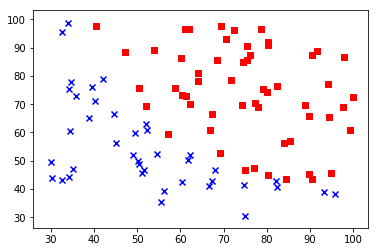

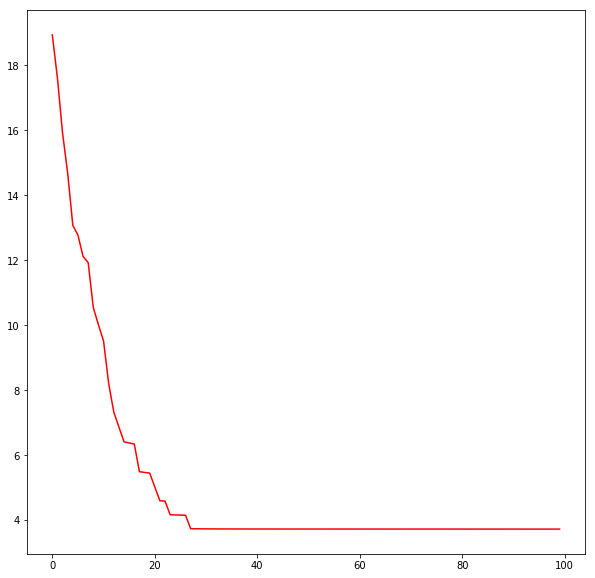

Train Accuracy: 80.00



In [77]:
X,Y,x,predict_x,predict_y=loadDataset('ex2data1.txt',0.95)
theta,cost_list,count=gradient_descent(0.001,X,Y)
print(theta)
pos = np.where(Y == 1)
neg = np.where(Y == 0)
plt.scatter(x[pos, 0], x[pos, 1], marker='s', c='r')
plt.scatter(x[neg, 0], x[neg, 1], marker='x', c='b')
plt.show()
plt.figure(figsize=(10,10))
# ValueError                                
plt.plot([i for i in range(100)],[i for i in cost_list[:100]],c='r')
plt.show()
predict_data = predict(predict_x,theta)
# predict_data[predict_data<0.5]=0
# predict_data[predict_data>=0.5]=1
print('Train Accuracy: %.2f\n'%(np.mean(np.double(predict_data == predict_y)) * 100))
